### Data exploration and preprocessing

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
# read raw data 
df_raw = pd.read_csv("data/all_merged_original.csv")

In [3]:
#Summary of dataframe
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4468 entries, 0 to 4467
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ax_By_Cz   4468 non-null   object 
 1   A          4468 non-null   object 
 2   B          4468 non-null   object 
 3   C          4468 non-null   object 
 4   x          4468 non-null   float64
 5   y          4468 non-null   float64
 6   z          4468 non-null   int64  
 7   structure  4468 non-null   object 
 8   S1         4468 non-null   int64  
 9   S2         4468 non-null   int64  
 10  S3         4468 non-null   int64  
 11  S4         4468 non-null   int64  
 12  Energy     4356 non-null   float64
 13  Av_chg_x   4363 non-null   float64
 14  Av_chg_y   4363 non-null   float64
 15  Avg_chg_z  4362 non-null   float64
 16  Charge     4356 non-null   float64
 17  M          4352 non-null   float64
 18  state      4355 non-null   float64
dtypes: float64(9), int64(5), object(5)
memory usage:

In [4]:
# explainatory statistics of data
df_raw.describe()

,x,y,z,S1,S2,S3,S4,Energy,Av_chg_x,Av_chg_y,Avg_chg_z,Charge,M,state
count,4468.000000,4468.000000,4468.0,4468.000000,4468.000000,4468.000000,4468.000000,4356.000000,4363.000000,4363.000000,4362.000000,4356.000000,4352.000000,4355.000000
mean,0.672001,0.327999,1.0,1.803044,1.381826,1.134736,0.928380,-183.024624,7.953381,7.905157,3.880972,189.479603,3.264792,0.584386
std,0.138378,0.138378,0.0,1.010653,0.914843,1.044873,1.205268,29.856081,0.413903,1.585273,0.158661,11.372316,4.822863,0.564152
min,0.375000,0.062500,1.0,0.000000,0.000000,0.000000,0.000000,-229.556643,7.500000,5.800000,3.600000,163.931000,-3.180000,0.000000
25%,0.562500,0.187500,1.0,1.000000,1.000000,0.000000,0.000000,-207.682229,7.500000,6.300000,3.700000,183.023000,0.000000,0.000000
50%,0.687500,0.312500,1.0,2.000000,1.000000,1.000000,0.000000,-189.806722,7.900000,8.400000,3.900000,189.222000,0.038000,1.000000
75%,0.812500,0.437500,1.0,2.000000,2.000000,2.000000,2.000000,-151.251283,8.500000,9.500000,4.000000,198.026500,5.784250,1.000000
max,0.937500,0.625000,1.0,4.000000,4.000000,4.000000,4.000000,186.624000,8.500000,10.400000,4.200000,216.692000,23.748000,2.000000


In [5]:
# check and drop for null values
print(df_raw.isna().sum())
df_raw = df_raw.dropna(how='any')

Ax_By_Cz       0
A              0
B              0
C              0
x              0
y              0
z              0
structure      0
S1             0
S2             0
S3             0
S4             0
Energy       112
Av_chg_x     105
Av_chg_y     105
Avg_chg_z    106
Charge       112
M            116
state        113
dtype: int64


In [6]:
# create dataframe using only required columns
df =df_raw[['A', 'B', 'C', 'x', 'y', 'z', 'structure', 'M']]

In [7]:
def count_sub_trans(structure,s_value):
    """
    Description: Counts the substituted transition metal atoms on the atomic sides S1, S2, S3 and, S4 
    Input: 
        structure - Number of substituted atoms, ranges from 1 to 16 
        s_value - Atomic sites: 1 for S1, 2 for S2, 3 for S3 and, 4 for S4
    Returns: 
        the total number of substituted transition metal atoms on sites S1, S2, S3, S4
    """
    
    # convert list of string to int
    if structure[-1] == ',':
        structure = structure[:-1]
        
    st = structure.split(',')
    structure = [int(i) for i in st]
    if s_value == 1:
        S1 = sum([int(e<=4 and e>=1) for e in structure])
        return S1
    elif s_value==2:
        S2 = sum([int(e<=8 and e>=5) for e in structure])
        return S2
    elif s_value==3:
        S3 = sum([int(e<=12 and e>=9) for e in structure])
        return S3
    else:
        S4 = sum([int(e<=16 and e>=13) for e in structure])
        return S4

In [8]:
# apply count_sub_trans function to create new features: S1, S2, S3, S4
df['S1'] = df['structure'].apply(count_sub_trans, s_value = 1)
df['S2'] = df['structure'].apply(count_sub_trans, s_value = 2)
df['S3'] = df['structure'].apply(count_sub_trans, s_value = 3)
df['S4'] = df['structure'].apply(count_sub_trans, s_value = 4)

C:\Users\dhanu\AppData\Local\Temp\ipykernel_26224\1263416670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S1'] = df['structure'].apply(count_sub_trans, s_value = 1)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26224\1263416670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S2'] = df['structure'].apply(count_sub_trans, s_value = 2)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26224\1263416670.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4348 entries, 0 to 4467
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   A          4348 non-null   object 
 1   B          4348 non-null   object 
 2   C          4348 non-null   object 
 3   x          4348 non-null   float64
 4   y          4348 non-null   float64
 5   z          4348 non-null   int64  
 6   structure  4348 non-null   object 
 7   M          4348 non-null   float64
 8   S1         4348 non-null   int64  
 9   S2         4348 non-null   int64  
 10  S3         4348 non-null   int64  
 11  S4         4348 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 441.6+ KB


Text(0.5, 1.0, 'Histogram of features')

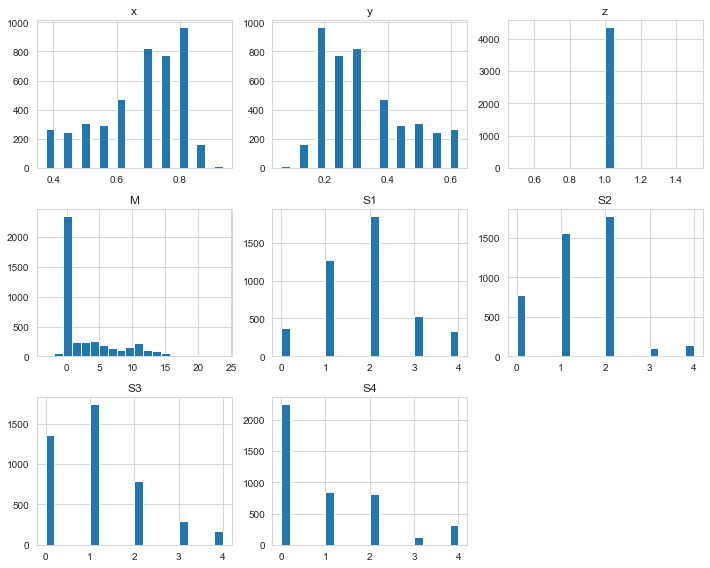

In [10]:
# distribution of data
df.hist(bins=20, figsize=(10,8))
plt.tight_layout()
plt.title("Histogram of features")

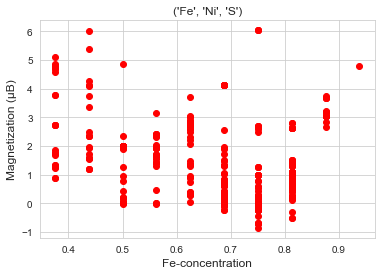

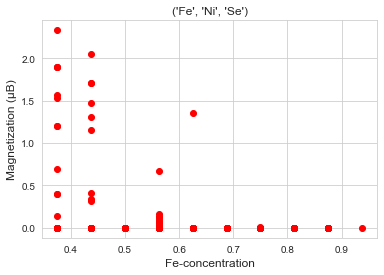

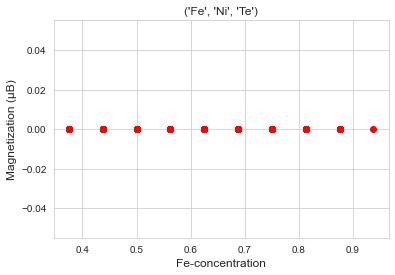

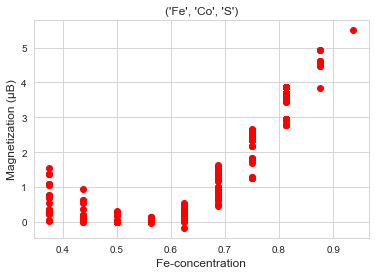

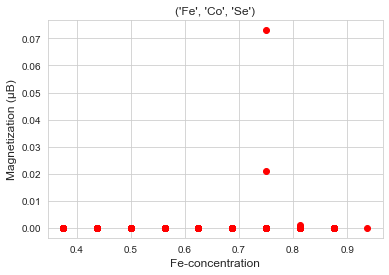

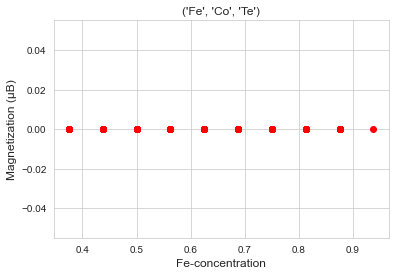

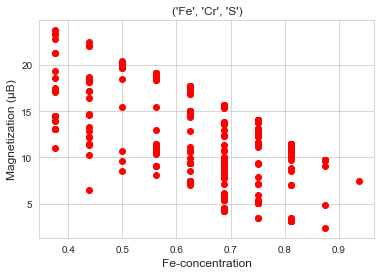

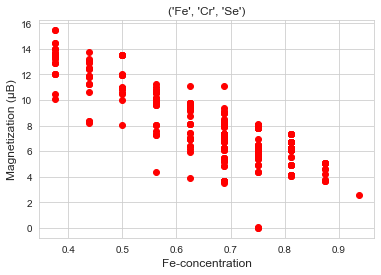

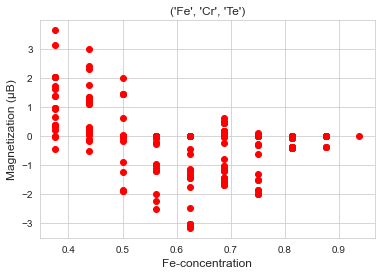

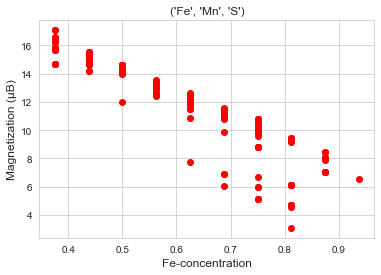

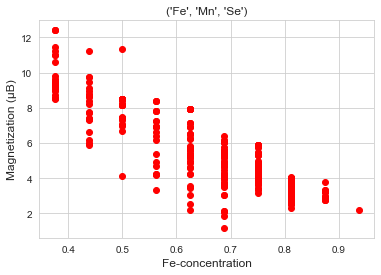

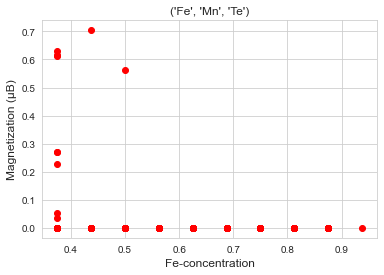

In [11]:
# Magnetization vs Fe-concentraion Scatter plot for different combinations of metal chalcogenides
for i in ["Ni", "Co", "Cr", "Mn"]:
    for j in ["S", "Se", "Te"]:
        df_BC = df[(df["B"]==i) & (df["C"]==j)]
        Fe_x = df_BC["x"]
        mag = df_BC["M"]
        title = ("Fe", i, j)
        plt.scatter(Fe_x, mag, marker='o', c='r')
        plt.title(title, fontsize=12)
        plt.xlabel('Fe-concentration', fontsize= 12)
        plt.ylabel('Magnetization (\u03BCB)', fontsize =12)
        plt.show()

### Overall variation of magnetization with Fe-concentration


Text(0, 0.5, 'Average Magnetzation with the concentration of Fe')

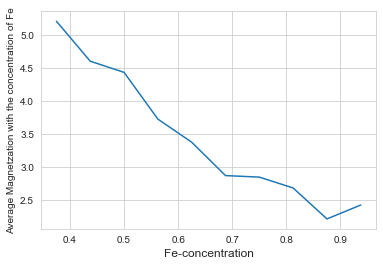

In [12]:
## Overall variation of magnetization with Fe-concentration
df_fe =df[['x','M']].groupby(['x'], as_index=False).mean()
plt.plot(df_fe['x'], df_fe['M'])
plt.xlabel("Fe-concentration", fontsize=12)
plt.ylabel("Average Magnetzation with the concentration of Fe")

### Varitation of magnetization with differnt combinations of transition metal and chalcogens

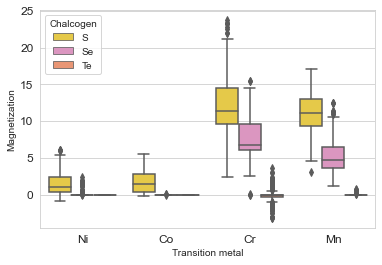

In [13]:
# magnetization vs transtion metal with different chalcogen combinations
plt.figure()
sns.boxplot(data=df, x='B',y='M', hue ='C', palette='Set2_r')
plt.xlabel("Transition metal")
plt.ylabel("Magnetization")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Chalcogen')

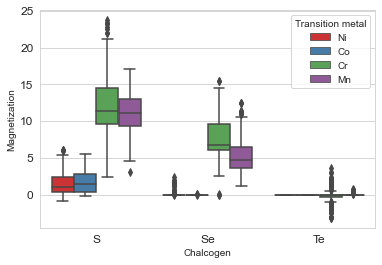

In [14]:
## magnetization vs Chalcogens with different metal comibination
plt.figure()
sns.boxplot(data=df, x='C',y='M', hue ='B', palette='Set1')
plt.xlabel("Chalcogen")
plt.ylabel("Magnetization")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Transition metal')

### Convert into new columns

In [15]:
# create new features to replace categorical data
df['Ni'] = df.apply(lambda x: x['y'] if x['B'] == 'Ni' else 0, axis=1)
df['Co'] = df.apply(lambda x: x['y'] if x['B'] == 'Co' else 0, axis=1)
df['Cr'] = df.apply(lambda x: x['y'] if x['B'] == 'Cr' else 0, axis=1)
df['Mn'] = df.apply(lambda x: x['y'] if x['B'] == 'Mn' else 0, axis=1)

df['Se'] = df.apply(lambda x: 1 if x['C'] == 'Se' else 0, axis=1)
df['S'] = df.apply(lambda x: 1 if x['C'] == 'S' else 0, axis=1)
df['Te'] = df.apply(lambda x: 1 if x['C'] == 'Te' else 0, axis=1)

df = df.rename(columns = {'x':'Fe'})

C:\Users\dhanu\AppData\Local\Temp\ipykernel_26224\567314695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ni'] = df.apply(lambda x: x['y'] if x['B'] == 'Ni' else 0, axis=1)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26224\567314695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Co'] = df.apply(lambda x: x['y'] if x['B'] == 'Co' else 0, axis=1)
C:\Users\dhanu\AppData\Local\Temp\ipykernel_26224\567314695.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [16]:
#dataframe with new columns
df.head()

,A,B,C,Fe,y,z,structure,M,S1,S2,S3,S4,Ni,Co,Cr,Mn,Se,S,Te
0,Fe,Ni,S,0.9375,0.0625,1,"1,",4.799,1,0,0,0,0.0625,0.0,0.0,0.0,0,1,0
1,Fe,Ni,S,0.8750,0.1250,1,"1,2",2.827,2,0,0,0,0.1250,0.0,0.0,0.0,0,1,0
2,Fe,Ni,S,0.8750,0.1250,1,"1,3",3.747,2,0,0,0,0.1250,0.0,0.0,0.0,0,1,0
3,Fe,Ni,S,0.8750,0.1250,1,"1,4",2.652,2,0,0,0,0.1250,0.0,0.0,0.0,0,1,0
4,Fe,Ni,S,0.8750,0.1250,1,"1,5",3.178,1,1,0,0,0.1250,0.0,0.0,0.0,0,1,0


In [17]:
# drop categorical columns 
df = df.drop(columns=['A','B','C','y','z','structure'])
df.head()

,Fe,M,S1,S2,S3,S4,Ni,Co,Cr,Mn,Se,S,Te
0,0.9375,4.799,1,0,0,0,0.0625,0.0,0.0,0.0,0,1,0
1,0.8750,2.827,2,0,0,0,0.1250,0.0,0.0,0.0,0,1,0
2,0.8750,3.747,2,0,0,0,0.1250,0.0,0.0,0.0,0,1,0
3,0.8750,2.652,2,0,0,0,0.1250,0.0,0.0,0.0,0,1,0
4,0.8750,3.178,1,1,0,0,0.1250,0.0,0.0,0.0,0,1,0


In [18]:
#export final data
df.to_csv("data/processed_1.csv", index=False)